## Install

`pip install treets`

In [ ]:
import treets.core as treets
import pandas as pd

## Data Required and Used By TREETS

1. Caloric Entry Logging

    Logging data typically comes from the [myCircadianClock](https://mycircadianclock.org/) application. TREETS functionality relies on columns that are found in these datasets, and therefore it is important that logging data fed into TREETS uses this format. Column names, such as 'food_type' and 'desc_text', are expected to match what is created by data from this app.

A single logging entry consists of all logged food/beverage/medication items logged by a single participant at a specific moment. The app allows users to retroactively log items, and instructs them to label the entire log with a single 'food type' that best fits the contents of the log.

In [ ]:
treets.file_loader('data/col_test_data/yrt*').head(2)

,original_logtime,desc_text,food_type,PID
0,2021-05-12 02:30:00 +0000,Milk,b,yrt1999
1,2021-05-12 02:45:00 +0000,Some Medication,m,yrt1999


2. 'Long Form' Participant Information Sheets

    To ensure that analysis is properly matched to specific participants and/or study phases, it is crucial that all particpant data used with TREETS follows the exact format specified in this [HOWTO](https://docs.google.com/document/d/1r0LmF3e7Y-7vKiuIVQ7UdYXkLdBn7otMv-6P6V30RxE/edit?usp=sharing) document. 

Participant information data should follow the HOWTO document that accompanies TREETS. A short recap of some of the most important points is provided here:

- Columns should be in the exact specified order (exact column names are less important than the column order).

- Date columns must be provided in ISO 8601

- Participants with rows that are missing data are not included in analysis. See the HOWTO document for more information.

- Study Phase and Intervention Group Names should be consistent for the same group (e.g. TRE and tre would be treated as two separate study groups)

- The number of intervention groups and study phases is not important, so long as other information is sensible (e.g. starting and ending periods for these phases do not accidentally overlap)

In [ ]:
pd.read_excel('data/col_test_data/toy_data_17May2021.xlsx').head(2)

,mCC_ID,Participant_Study_ID,Study Phase,Intervention group (TRE or HABIT),Start_Day,End_day,Eating_Window_Start,Eating_Window_End
0,yrt1999,2,S-REM,TRE,2021-05-12 00:00:00,2021-05-14 00:00:00,00:00:00,23:59:00
1,yrt1999,2,T3-INT,TRE,2021-05-15 00:00:00,2021-05-18 00:00:00,08:00:00,18:00:00


## Phased Study Example

TREETS comes with a summary analysis function built specifically for phased studies. By default, it prints a report outlining dates where participants were missing logs or where non-adherent to their current assigned eating window for that date.

In [ ]:
df = treets.summarize_data_with_experiment_phases(treets.file_loader('data/col_test_data/yrt*')\
                      , pd.read_excel('data/col_test_data/toy_data_17May2021.xlsx'))

Participant yrt1999 didn't log any food items in the following day(s):
2021-05-12
2021-05-13
2021-05-14
2021-05-15
2021-05-16
2021-05-17
2021-05-18
Participant yrt2000 didn't log any food items in the following day(s):
2021-05-12
2021-05-13
2021-05-14
2021-05-15
2021-05-16
2021-05-17
2021-05-18
Participant yrt1999 have bad logging day(s) in the following day(s):
2021-05-12
2021-05-15
Participant yrt1999 have bad window day(s) in the following day(s):
2021-05-15
Participant yrt1999 have non adherent day(s) in the following day(s):
2021-05-12
2021-05-15


In [ ]:
df

,mCC_ID,Participant_Study_ID,Study Phase,Intervention group (TRE or HABIT),Start_Day,End_day,Eating_Window_Start,Eating_Window_End,phase_duration,caloric_entries_num,...,logging_day_counts,%_logging_day_counts,good_logging_days,%_good_logging_days,good_window_days,%_good_window_days,outside_window_days,%_outside_window_days,adherent_days,%_adherent_days
0,yrt1999,2,S-REM,TRE,2021-05-12,2021-05-14,00:00:00,23:59:00,3 days 00:00:00,7,...,3,100.0%,0.0,0.0%,1.0,33.33%,0.0,0.0%,0.0,0.0%
1,yrt1999,2,T3-INT,TRE,2021-05-15,2021-05-18,08:00:00,18:00:00,4 days 00:00:00,8,...,3,75.0%,0.0,0.0%,0.0,0.0%,1.0,25.0%,0.0,0.0%
2,yrt2000,3,T3-INT,TRE,2021-05-12,2021-05-14,08:00:00,16:00:00,3 days 00:00:00,0,...,0,0.0%,0.0,0.0%,0.0,0.0%,0.0,0.0%,0.0,0.0%
3,yrt2000,3,T3-INT,TRE,2021-05-15,2021-05-18,08:00:00,16:00:00,4 days 00:00:00,0,...,0,0.0%,0.0,0.0%,0.0,0.0%,0.0,0.0%,0.0,0.0%
4,yrt2001,4,T12-A,TRE,NaT,NaT,NaN,NaN,NaT,0,...,0,nan%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Each row in the resulting dataframe represents summary data for a participant during a specific study phase and assigned eating window combination. If a participant has had more than one assigned eating window during a study phase, each eating window will receive a summary row that describes the data for the duration of the assignment.

Additionally, the majority of statistical information here is contingent on the participant having enough data to generate valid statistics. Daily averages and standard deviation measurements require participants to have a minimum number of logs on each day and a minimum number of days logged (e.g. standard deviation of first caloric entry would be incalculable if the participant only has a single caloric entry for that study phase in the dataset). Similarly, eating window calculations and percentiles are only available if a participant has a valid eating window (e.g. days with only a single caloric log do not produce a valid eating window).

In [ ]:
df.iloc[0]

mCC_ID                                       yrt1999
Participant_Study_ID                               2
Study Phase                                    S-REM
Intervention group (TRE or HABIT)                TRE
Start_Day                                 2021-05-12
End_day                                   2021-05-14
Eating_Window_Start                         00:00:00
Eating_Window_End                           23:59:00
phase_duration                       3 days 00:00:00
caloric_entries_num                                7
medication_num                                     0
water_num                                          0
first_cal_avg                               5.916667
first_cal_std                               2.240722
last_cal_avg                               19.666667
last_cal_std                               12.933323
mean_daily_eating_window                       13.75
std_daily_eating_window                    11.986972
earliest_entry                                

## Non-Phased Summaries.

TREETs also houses a function made to summarize participant data for an entire study.

In [ ]:
df = treets.file_loader('data/test_food_details.csv')
df.head(2)

,ID,unique_code,research_info_id,desc_text,food_type,original_logtime,foodimage_file_name
0,7572733,alqt14018795225,150,Water,w,2017-12-08 17:30:00+00:00,NaN
1,411111,alqt14018795225,150,Coffee White,b,2017-12-09 00:01:00+00:00,NaN


TREETS makes use of more specific time-based identifiers to help group data. For their specific use cases, please refer to the API.

In [ ]:
df = treets.load_food_data(df, h = 4)
df.head(2)

,ID,unique_code,research_info_id,desc_text,food_type,original_logtime,date,float_time,time,week_from_start,year
0,7572733,alqt14018795225,150,Water,w,2017-12-08 17:30:00+00:00,2017-12-08,17.500000,17:30:00,1,2017
1,411111,alqt14018795225,150,Coffee White,b,2017-12-09 00:01:00+00:00,2017-12-08,24.016667,00:01:00,1,2017


In [ ]:
df = treets.summarize_data(df)
df.head(2)

,unique_code,num_days,num_total_items,num_f_n_b,num_medications,num_water,first_cal_avg,first_cal_std,last_cal_avg,last_cal_std,eating_win_avg,eating_win_std,good_logging_count,first_cal variation (90%-10%),last_cal variation (90%-10%),2.5%,95%,duration mid 95%
0,alqt1148284857,13,149,96,19,34,7.821795,6.710717,23.485897,4.869082,15.664103,8.231201,146,2.750,10.050,4.593750,27.129167,22.589583
1,alqt14018795225,64,488,484,3,1,7.525781,5.434563,25.858594,3.374839,18.332813,6.603913,484,13.195,3.105,4.183333,27.445000,23.416667


In [ ]:
df.iloc[0]

unique_code                      alqt1148284857
num_days                                     13
num_total_items                             149
num_f_n_b                                    96
num_medications                              19
num_water                                    34
first_cal_avg                          7.821795
first_cal_std                          6.710717
last_cal_avg                          23.485897
last_cal_std                           4.869082
eating_win_avg                        15.664103
eating_win_std                         8.231201
good_logging_count                          146
first_cal variation (90%-10%)              2.75
last_cal variation (90%-10%)              10.05
2.5%                                    4.59375
95%                                   27.129167
duration mid 95%                      22.589583
Name: 0, dtype: object

## Log Cleaning and Parsing

An additional feature that comes with TREETS is 'food log' cleaning and parsing. Using a dictionary of common mispellings (and their corrections), TREETS attempts to spell correct typos made in food logs. Food logs are then n-gram matched through a dictionary of n-gram food and medication related phrases to create a list of individual items.

In [ ]:
# import the dataset
df = treets.file_loader('data/col_test_data/yrt*')
df.head(3)

,original_logtime,desc_text,food_type,PID
0,2021-05-12 02:30:00 +0000,Milk,b,yrt1999
1,2021-05-12 02:45:00 +0000,Some Medication,m,yrt1999
2,2021-05-12 04:45:00 +0000,bacon egg,f,yrt1999


In [ ]:
treets.clean_loggings(df).head(3)

,desc_text,cleaned
0,Milk,[milk]
1,Some Medication,[medication]
2,bacon egg,"[bacon, egg]"


## Visualizations

TREETS includes a small suite of visualizations. Some examples are included below.

In [ ]:
# import the dataset
df = treets.file_loader('data/test_food_details.csv')
df.head(2)

,ID,unique_code,research_info_id,desc_text,food_type,original_logtime,foodimage_file_name
0,7572733,alqt14018795225,150,Water,w,2017-12-08 17:30:00+00:00,NaN
1,411111,alqt14018795225,150,Coffee White,b,2017-12-09 00:01:00+00:00,NaN


A scatter plot for people's breakfast time

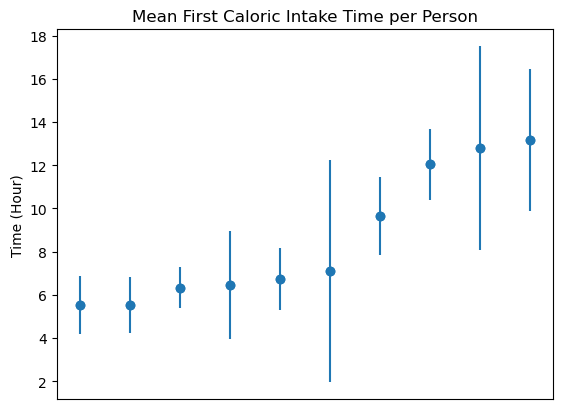

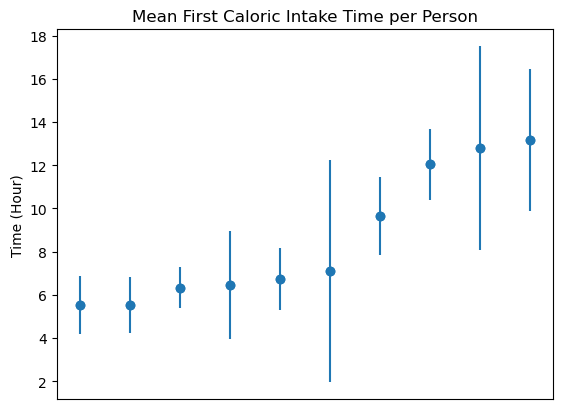

In [ ]:
# create required features for function first_cal_mean_with_error_bar()
df['original_logtime'] = pd.to_datetime(df['original_logtime'])
df['local_time'] = treets.find_float_time(df, h = 4)
df['date'] = treets.find_date(df, h = 4)

# call the function
treets.first_cal_mean_with_error_bar(df)

Use swarmplot to visualize each person's eating time distribution.

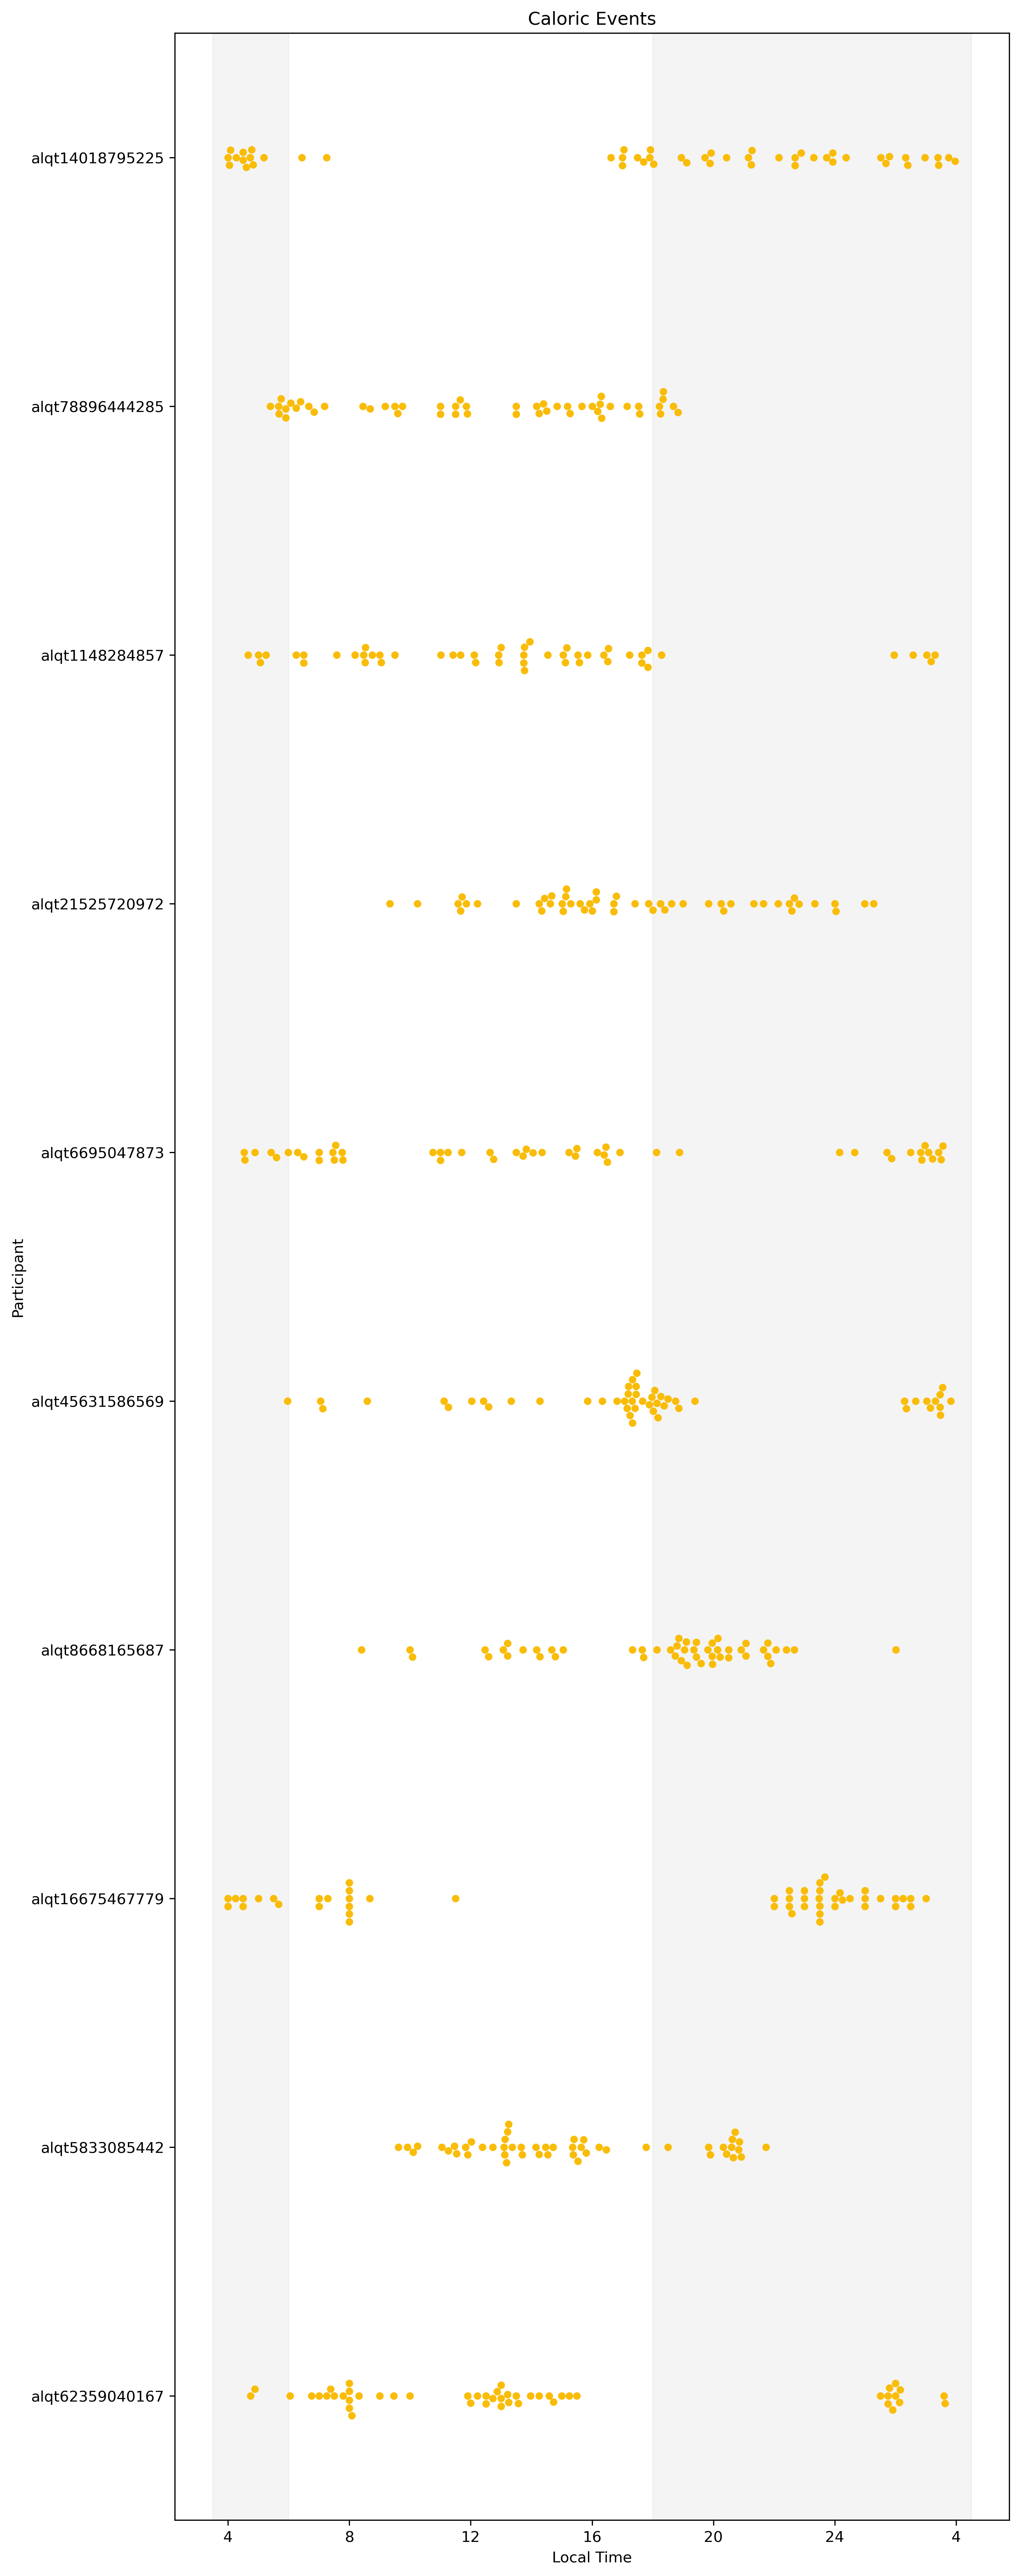

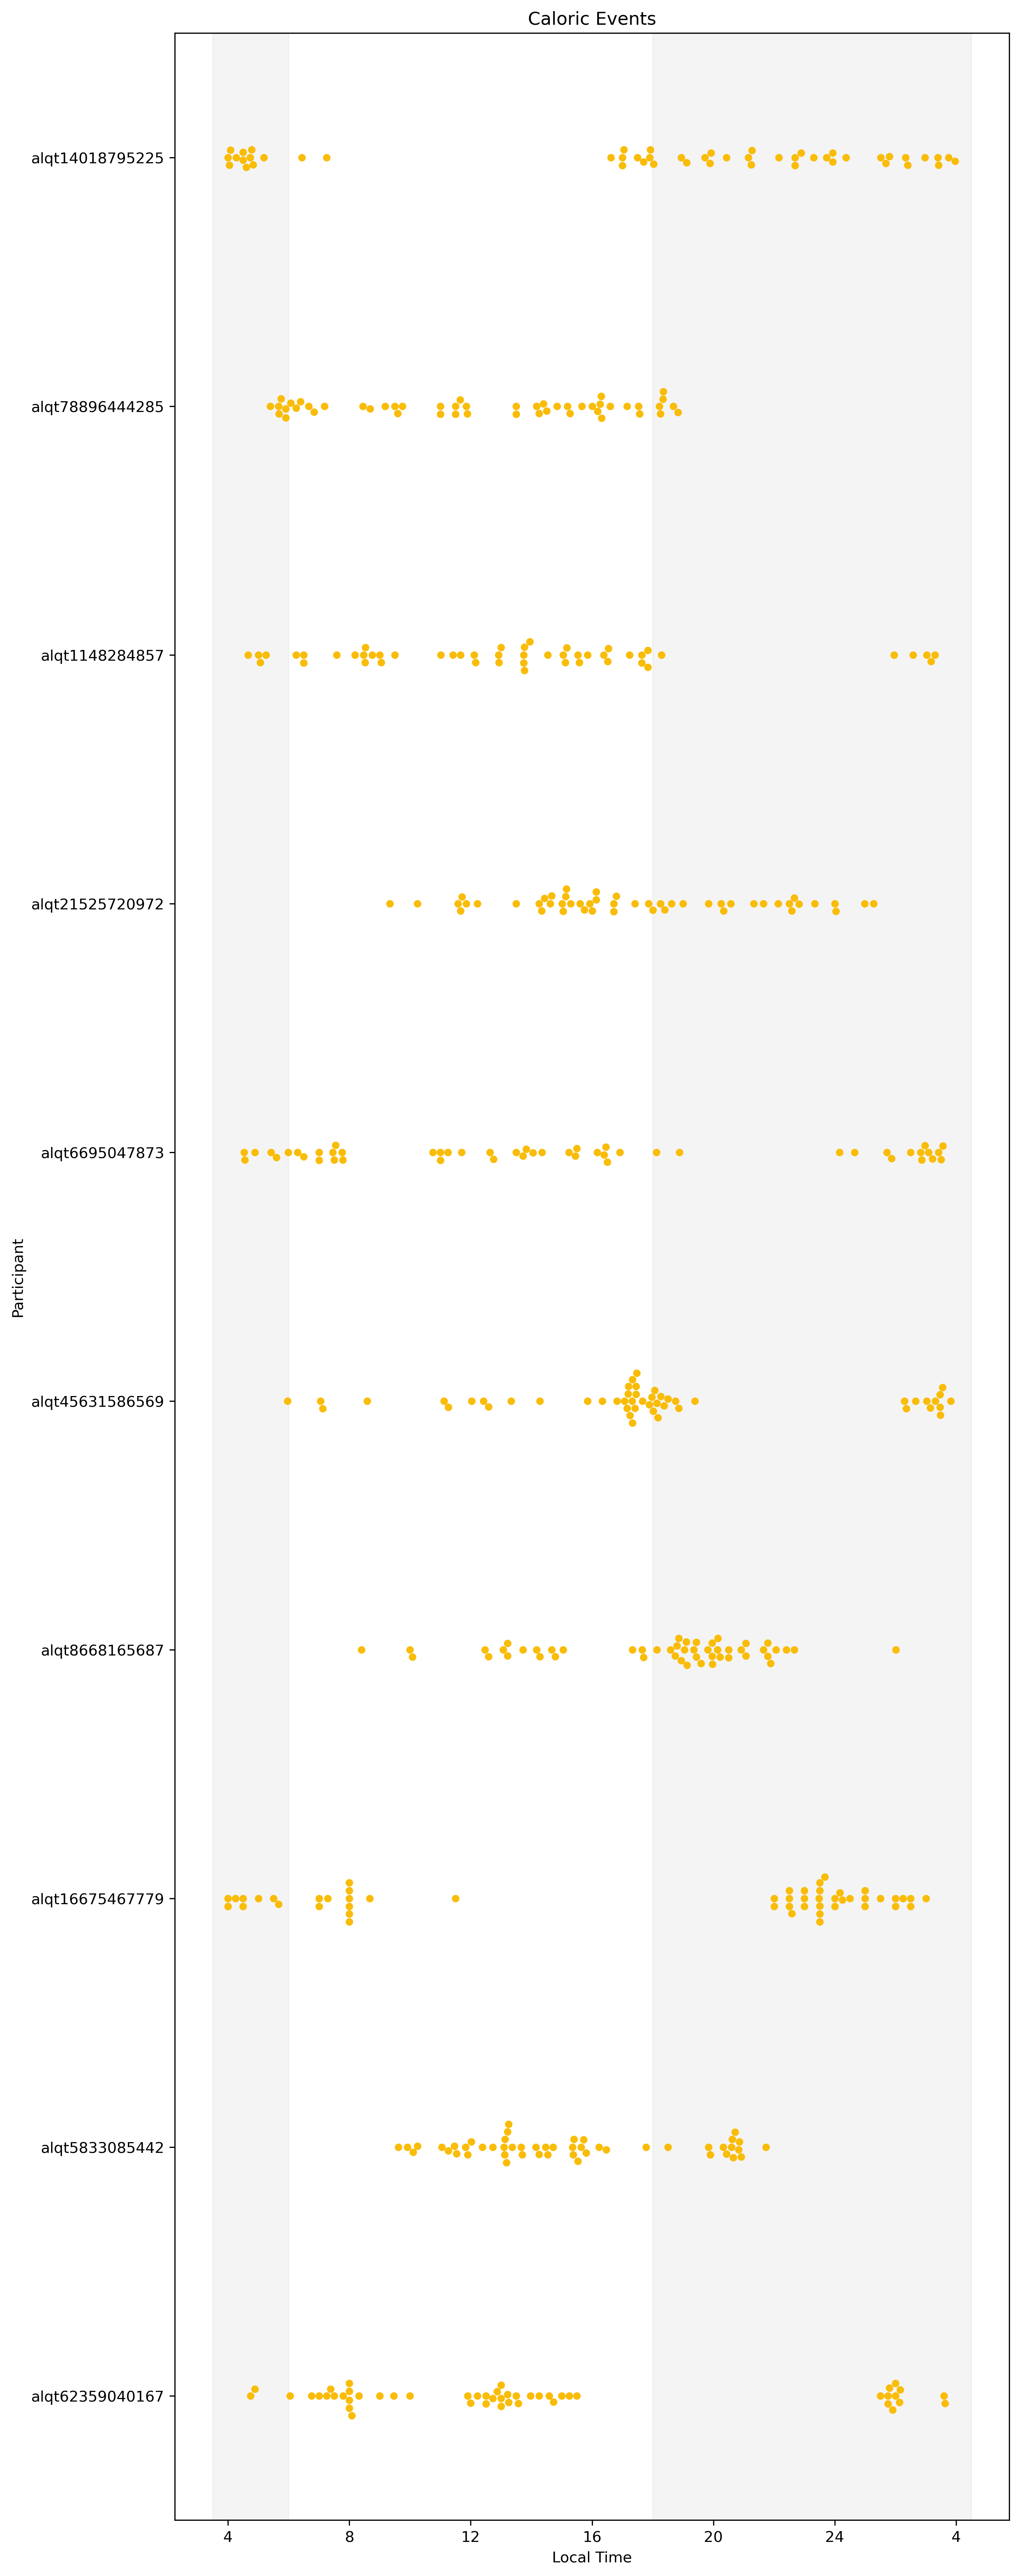

In [ ]:
treets.swarmplot(df, max_loggings = 50)